<div style="text-align: center;">

# Understanding Factors Influencing Life Expectancy and Implications in Southeast Asia (2000-2023)

</div>

<div style="text-align: center;">
    <img src="https://static.wixstatic.com/media/94cc53_264ec4c40e3a4aaf852261200e9cf712~mv2.png/v1/fill/w_740,h_417,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/94cc53_264ec4c40e3a4aaf852261200e9cf712~mv2.png" alt="Image Description" />
</div>


**Dataset Description:**
<br>
This capstone project use the "World Health Statistics" dataset from World Development Indicators (WDI) . This dataset contains information about various health indicators from different countries, including life expectancy, mortality rates, disease prevalence, and health service coverage.

**Source:** The World Development Indicators (WDI) 

**Key Features:**
- **Country:** Name of the country
- **Year:** Year of the data
- **Life Expectancy:** Average life expectancy at birth
- **Mortality Rate:** Mortality rate per 1000 live births
- **Prevalence:** Prevalence of certain factors (Malaria, Tobacco, Undernourishment)
- **Health Service Coverage:** Coverage of essential health services

---

## Problem Statement

**Problem Statement:**
<br>
**Disparity in Life Expectancy and Its Association with Health Service Coverage and Disease Prevalence**
<br>
The problem we will address is the disparity in life expectancy across different countries and its association with health service coverage and disease prevalence. The goal is to understand the factors contributing to lower life expectancy in certain regions and propose strategies to improve overall life expectancy.

**Importance:**
<br>
Addressing this issue is crucial for achieving Sustainable Development Goal 3 (Good Health and Well-being). Improving life expectancy is a key indicator of overall health and well-being. By identifying and addressing the factors that negatively impact life expectancy, it is possible to promote equitable health outcomes and enhance the quality of life globally. Success will be measured by improvements in life expectancy rates and increased access to essential health services in low-income regions. Engaging key stakeholders, including governments, NGOs, and international health organizations, will ensure comprehensive and sustainable solutions.

---

In [144]:
# Importing modules
import pandas as pd # Importing the pandas library for data manipulation.
import numpy as np # Importing the NumPy library for numerical operations.
import matplotlib.pyplot as plt # Importing Matplotlib's pyplot module for plotting.
import seaborn as sns # Importing the Seaborn library for enhanced data visualization.

# This line ensures that Matplotlib plots are displayed inline within the Jupyter Notebook.
%matplotlib inline

In [145]:
# Read datasets file into df
df = pd.read_csv('good_health_and_well_being.csv', skiprows=4)

In [146]:
# get row, column
df.shape

(67564, 68)

In [147]:
# Display the data types of each column in the DataFrame
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
Length: 68, dtype: object

In [148]:
# Display the first few rows of the DataFrame
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,Completeness of death registration with cause-...,SP.REG.DTHS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,Completeness of birth registration (%),SP.REG.BRTH.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Completeness of birth registration, urban (%)",SP.REG.BRTH.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Completeness of birth registration, rural (%)",SP.REG.BRTH.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="text-align: center;">
    <img src="https://www.managedoutsource.com/wp-content/uploads/2023/02/data-profiling-and-data-cleansing.jpg" />
</div>



## Perform Data Cleaning and Transformation

**Initial State of Dataset:**
- **Missing Values:** Some countries may have missing data for certain years.
- **Data Types:** Ensuring all columns have appropriate data types (e.g., numerical for health indicators and year).

**Data Cleaning Steps:**
- **Handling Missing Values:** Impute missing values or remove rows/columns with excessive missing data.
- **Correcting Data Types:** Ensure all columns have the correct data type.

**Data Transformation Steps:**
- **Creating New Variables:** Calculate additional indicators, such as the ratio of health service coverage to prevalence.
- **Aggregations:** Aggregate data to get country-level averages over certain periods.


In [150]:
df['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [151]:
# List of Southeast Asian countries.
southeast_asia = ['Brunei Darussalam',  
                  'Cambodia', 
                  'Vietnam', 
                  'Timor-Leste', 
                  'Indonesia',  
                  'Malaysia', 
                  'Philippines', 
                  'Singapore', 
                  'Thailand']

# Check if the 'Country Name' column exists in the DataFrame.
if 'Country Name' in df.columns:
    df_filter_countries = df[df['Country Name'].isin(southeast_asia)]

# Get the unique country names from the filtered DataFrame.
df_filter_countries['Country Name'].unique()

array(['Brunei Darussalam', 'Indonesia', 'Cambodia', 'Malaysia',
       'Philippines', 'Singapore', 'Thailand', 'Timor-Leste'],
      dtype=object)

In [152]:
# Get the unique indicator names from the 'Indicator Name' column 
unique_indicator_names = df_filter_countries['Indicator Name'].unique()
unique_indicator_names_sorted = sorted(unique_indicator_names)
unique_indicator_names_sorted

['ARI treatment (% of children under 5 taken to a health provider)',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
 'Adults (ages 15-49) newly infected with HIV',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Antiretroviral therapy coverage (% of people living with HIV)',
 'Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
 'Cause of death, by injury (% of total)',
 'Cause of death, by non-communicable diseases (% of total)',
 'Children (0-14) living with HIV',
 'Children (ages 0-14) newly infected with HIV',
 'Children with fever rec

In [153]:
#drop column 
df_filter_countries = df_filter_countries.drop(columns=['Country Code', 'Indicator Code'])

# select certain year
unselected_years = [str(year) for year in range(1960, 2000)]

In [154]:
# drop column year 1960 - 1999
df_filter_countries = df_filter_countries.drop(columns=unselected_years)

In [155]:
df_filter_countries.head()

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
7874,Brunei Darussalam,Unmet need for contraception (% of married wom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7875,Brunei Darussalam,Completeness of death registration with cause-...,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7876,Brunei Darussalam,Completeness of birth registration (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.9,NaN,NaN,NaN
7877,Brunei Darussalam,"Completeness of birth registration, urban (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7878,Brunei Darussalam,"Completeness of birth registration, rural (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*owcbeU3DJXimD0rmO8358Q.png" />
</div>


# Perform Exploratory Data Analysis (EDA) For Visualization and Insights

---

## 1) Life Expectancy: Average life expectancy at birth

Life expectancy at birth is a statistic that tells us the average number of years a newborn baby is expected to live if the current conditions affecting health and mortality (death rates) stay the same throughout their life.

**Example:**
- **High Life Expectancy:** If the life expectancy is 80 years, it means that on average, a baby born today can expect to live until they are 80 years old.
- **Low Life Expectancy:** If the life expectancy is 60 years, it suggests that there are more health challenges and lower living standards.

In summary, life expectancy at birth gives us an idea of how long people are likely to live in a certain area, based on current health, living conditions, and death rates.

In [160]:
# Filter the DataFrame to include only the rows where the 'Indicator Name' is 'Life expectancy at birth, total years
df_life_expectancy = df_filter_countries[df_filter_countries['Indicator Name']=='Life expectancy at birth, total (years)'] 

In [161]:
# Drop the 'Indicator Name' column
df_life_expectancy = df_life_expectancy.drop(columns=['Indicator Name'])

In [162]:
# Reshape the DataFrame from wide format to long format
df_long = pd.melt(df_life_expectancy, 
                  id_vars=['Country Name'], #variable
                  var_name='Year', 
                  value_name='Life Expectancy') #values 

In [163]:
# Convert the 'Year' column to numeric
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

In [164]:
# Drop rows where the 'Life Expectancy' column has NaN values
life_expectancy = df_long.dropna(subset=['Life Expectancy'])

In [165]:
life_expectancy

,Country Name,Year,Life Expectancy
0,Brunei Darussalam,2000,74.080000
1,Indonesia,2000,66.433000
2,Cambodia,2000,58.625000
3,Malaysia,2000,72.775000
4,Philippines,2000,69.413000
...,...,...,...
179,Malaysia,2022,76.260000
180,Philippines,2022,72.187000
181,Singapore,2022,82.895122
182,Thailand,2022,79.680000


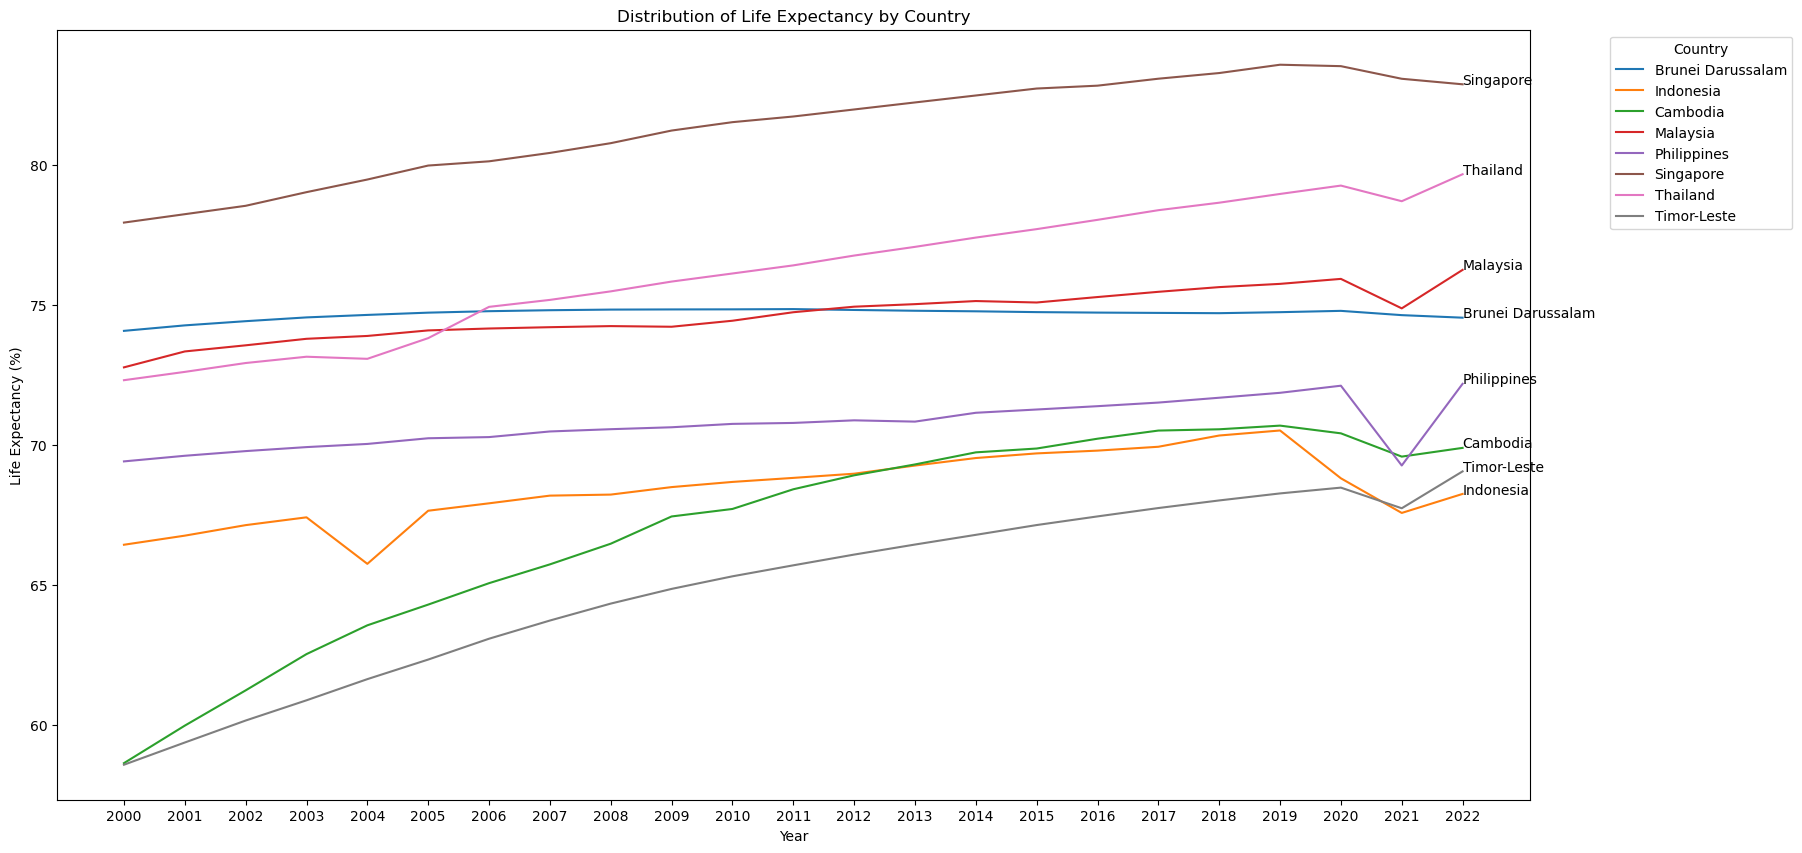

In [166]:
# Plot using Seaborn
fig, ax = plt.subplots(figsize=(19, 10))
sns.lineplot(data=life_expectancy, x='Year', y='Life Expectancy', hue='Country Name', ax=ax)

# Adding country labels at the last data point for each country
for country in life_expectancy['Country Name'].unique():
    country_data = life_expectancy[life_expectancy['Country Name'] == country]
    ax.text(country_data['Year'].max(), 
            country_data['Life Expectancy'].values[-1], 
            country, 
            horizontalalignment='left', 
            size='medium', 
            color='black')

# Set x-axis ticks to all unique years in the data
ax.set_xticks(life_expectancy['Year'].unique())

plt.title('Distribution of Life Expectancy by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (%)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Summary of Life Expectancy Trends (2000-2023)

- **Highest Life Expectancy**: Singapore stands out with the highest life expectancy, consistently leading from 2000 to 2022.
- **Steady Improvements**: Thail, Brunei nd and Malaysia both show strong, steady increases in life expectancy, reflecting significant improvements in healthcare and living standards.
- **Moderate Growth**: The Philippines shows gradual but steady growth in life expectancy.
- **Significant Improvements from Lower Base**: Cambodia and Timor-Leste, starting from lower life expectancy bases, have shown remarkable improvements, reflecting significant progress in public health and socio-economic conditions.
- **Impact of COVID-19**: Most countries experienced a dip in life expectancy around 2020-2021 due to the COVID-19 pandemic, but a quick recovery is observed in subsequent years.


---
### 2) Mortality Rate: Mortality rate per 1000 live births

The mortality rate per 1000 live births is a way to measure how many babies die before their first birthday out of every 1000 babies born alive in a year. In short, the mortality rate per 1000 live births helps us understand how well a place is doing at keeping its youngest residents healthy and alive.

**Example**
- **High Mortality Rate:** If a country has a high mortality rate, such as 50 deaths per 1000 live births, it suggests significant challenges in healthcare and living conditions that need to be addressed.
- **Low Mortality Rate:** A low mortality rate, such as 5 deaths per 1000 live births, indicates better healthcare services and healthier living conditions.

In [170]:
# Filter the DataFrame to include only the rows where the 'Indicator Name' is Mortality rates
df_mortality_rate = df_filter_countries[df_filter_countries['Indicator Name']=='Mortality rate, infant (per 1,000 live births)'] 

In [171]:
# Drop the 'Indicator Name' column
df_mortality_rate = df_mortality_rate.drop(columns=['Indicator Name'])

In [172]:
# Reshape the DataFrame from wide format to long format
df_long_mr = pd.melt(df_mortality_rate, 
                  id_vars=['Country Name'], 
                  var_name='Year', 
                  value_name='mortality rate')

In [173]:
# Convert the 'Year' column to numeric
df_long_mr['Year'] = pd.to_numeric(df_long_mr['Year'], errors='coerce')

In [174]:
# Drop rows where the 'mortality rate'' column has NaN values
mortality_rate = df_long_mr.dropna(subset=['mortality rate'])

In [175]:
mortality_rate

,Country Name,Year,mortality rate
0,Brunei Darussalam,2000,8.4
1,Indonesia,2000,40.9
2,Cambodia,2000,79.0
3,Malaysia,2000,8.7
4,Philippines,2000,28.2
...,...,...,...
179,Malaysia,2022,6.7
180,Philippines,2022,21.8
181,Singapore,2022,1.8
182,Thailand,2022,7.0


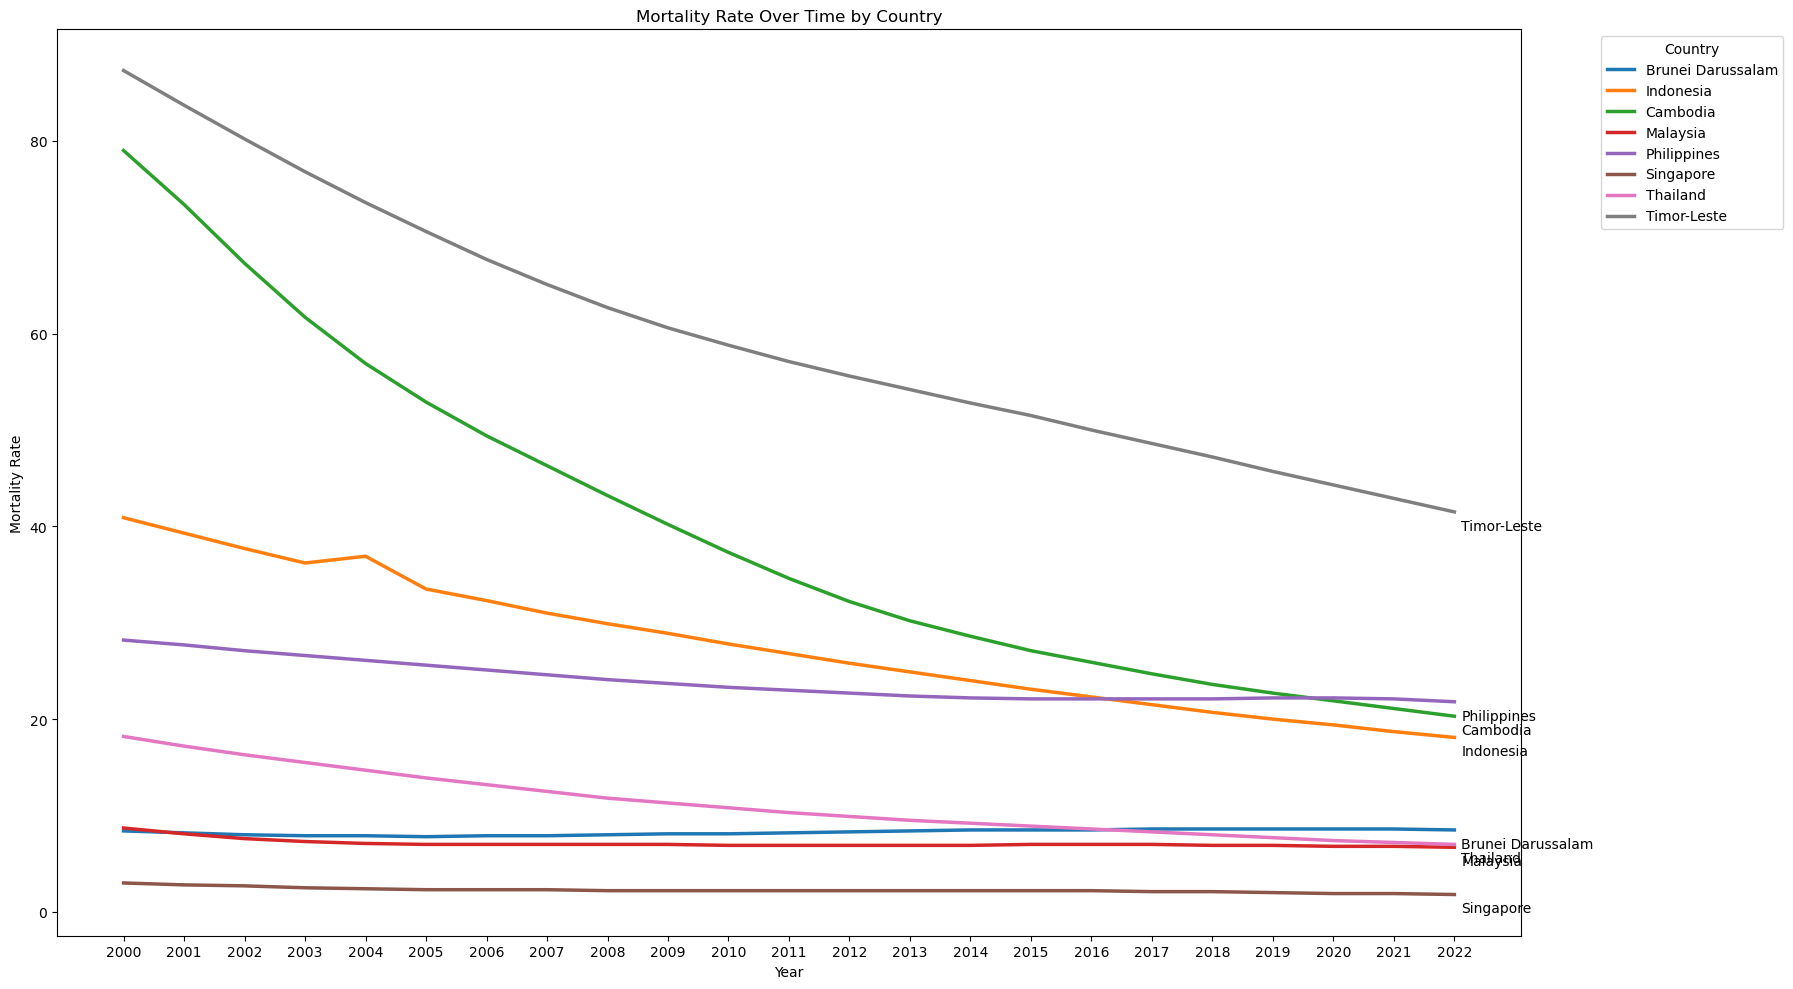

In [176]:
plt.figure(figsize=(18, 10))

# Create line plot with country names annotated
sns.lineplot(x='Year', y='mortality rate', hue='Country Name', data=mortality_rate, linewidth=2.5)

# Annotate each line with country names
for country in mortality_rate['Country Name'].unique():
    country_data = mortality_rate[mortality_rate['Country Name'] == country]
    plt.annotate(country, 
                 xy=(country_data['Year'].max(), country_data['mortality rate'].values[-1]),
                 xytext=(5, -5),
                 textcoords='offset points',
                 horizontalalignment='left',
                 verticalalignment='top',
                 fontsize='medium')
    
plt.xticks(mortality_rate['Year'].unique())

plt.title('Mortality Rate Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Summary of Mortality Rate Trends (2000-2023)

- **Lowest Mortality Rate**: Singapore consistently maintains the lowest mortality rate, reflecting its excellent healthcare system and high living standards.
- **Significant Improvements**: Thail, Bruneiand and Malaysia show steady decreases in mortality rates, indicating significant advancements in healthcare.
- **Moderate Decreases**: The Philippines shows a gradual but steady decrease in mortality rate, reflecting ongoing improvements in public health.
- **Rapid Progress**: Cambodia and Timor-Leste, starting from higher mortality rates, have shown remarkable improvements, reflecting major advancements in healthcare infrastructure and public health initiatives.
- **Consistent Decrease**: Indonesia shows a consistent decrease in mortality rate, highlighting improvements in healthcare and living conditions over the years.


---
## 3) Prevalence: Prevalence of Tobacco

The prevalence of current tobacco use is a measure that tells us the percentage of adults who currently use tobacco products, such as cigarettes, cigars, pipes, or smokeless tobacco.

**Example:**
- **High Prevalence:** If the prevalence of current tobacco use is 30%, it means that 30 out of every 100 adults are currently using tobacco.
- **Low Prevalence:** If the prevalence is 10%, only 10 out of every 100 adults are currently using tobacco.

In summary, the prevalence of current tobacco use (% of adults) shows us how widespread tobacco use is among adults in a population, helping to understand public health risks and guide health initiatives.

In [180]:
df_prevalence_of_tobacco = df_filter_countries[df_filter_countries['Indicator Name']=='Prevalence of current tobacco use (% of adults)'] 

In [181]:
# Drop the 'Indicator Name' column
df_prevalence_of_tobacco = df_prevalence_of_tobacco.drop(columns=['Indicator Name'])

In [182]:
# Reshape the DataFrame from wide format to long format
df_long_pot = pd.melt(df_prevalence_of_tobacco, 
                  id_vars=['Country Name'], 
                  var_name='Year', 
                  value_name='prevalence of tobacco')

In [183]:
# Convert the 'Year' column to numeric
df_long_pot['Year'] = pd.to_numeric(df_long_pot['Year'], errors='coerce')

In [184]:
# Drop rows where the 'prevalence of tobacco' column has NaN values
prevalence_of_tobacco = df_long_pot.dropna(subset=['prevalence of tobacco'])

In [185]:
prevalence_of_tobacco

,Country Name,Year,prevalence of tobacco
0,Brunei Darussalam,2000,16.7
1,Indonesia,2000,35.4
2,Cambodia,2000,42.3
3,Malaysia,2000,29.5
4,Philippines,2000,34.9
5,Singapore,2000,16.4
6,Thailand,2000,31.7
7,Timor-Leste,2000,53.5
40,Brunei Darussalam,2005,16.5
41,Indonesia,2005,35.8


Text(0.5, 1.0, 'Prevalence of Tobacco Use Over Time by Country')

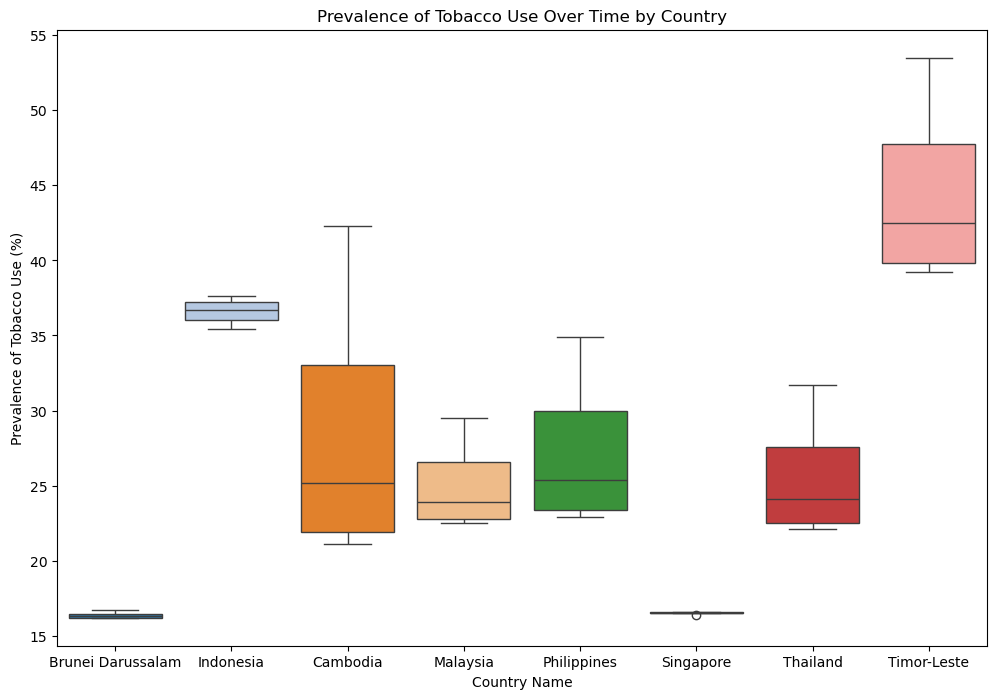

In [186]:
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.boxplot(data=prevalence_of_tobacco, x="Country Name", y="prevalence of tobacco", hue="Country Name", palette='tab20', dodge=False)
plt.ylabel("Prevalence of Tobacco Use (%)")
plt.title("Prevalence of Tobacco Use Over Time by Country")

### Summary of Tobacco Use Prevalence

- **Higher Prevalence**: 
  - Timor-Leste and Indonesia have the highest prevalence of tobacco use.
<br>
- **Lower Prevalence**: 
  - Singapore and Brunei have the lowest prevalence.
<br>
- **Variability**: 
  - Cambodia shows the greatest variability in tobacco use prevalence.
  - Indonesia and Malaysia have the least variability in tobacco use prevalence.t.


---
## 4) Prevalence: Prevalence of Undernourishment

The prevalence of undernourishment is a measure that tells us the percentage of people in a population who do not have enough food to meet their daily energy requirements.

**Example:**
- **High Prevalence:** If the prevalence of undernourishment is 30%, it means that 30 out of every 100 people in the population do not have enough food.
- **Low Prevalence:** If the prevalence is 5%, only 5 out of every 100 people are undernourished.

In summary, the prevalence of undernourishment (% of population) shows us how many people in a population are not getting enough food. This helps in understanding the scale of food insecurity and guiding efforts to improve access to nutrition.

In [190]:
# Filter the DataFrame to include only the rows where the 'Indicator Name' is Prevalence of undernourishment
df_undernourishment = df_filter_countries[df_filter_countries['Indicator Name']=='Prevalence of undernourishment (% of population)'] 

In [191]:
# Drop the 'Indicator Name' column
df_undernourishment = df_undernourishment.drop(columns=['Indicator Name'])

In [192]:
# Reshape the DataFrame from wide format to long format
df_long_u = pd.melt(df_undernourishment, 
                  id_vars=['Country Name'], 
                  var_name='Year', 
                  value_name='undernourishment')

In [193]:
# Convert the 'Year' column to numeric
df_long_u['Year'] = pd.to_numeric(df_long_u['Year'], errors='coerce')

In [194]:
# Drop rows where the 'undernourishmeny' column has NaN values
undernourishment = df_long_u.dropna(subset=['undernourishment'])

In [195]:
undernourishment

,Country Name,Year,undernourishment
9,Indonesia,2001,19.0
10,Cambodia,2001,24.3
11,Malaysia,2001,2.5
12,Philippines,2001,18.9
14,Thailand,2001,17.3
...,...,...,...
170,Cambodia,2021,4.8
171,Malaysia,2021,2.7
172,Philippines,2021,5.2
174,Thailand,2021,5.2


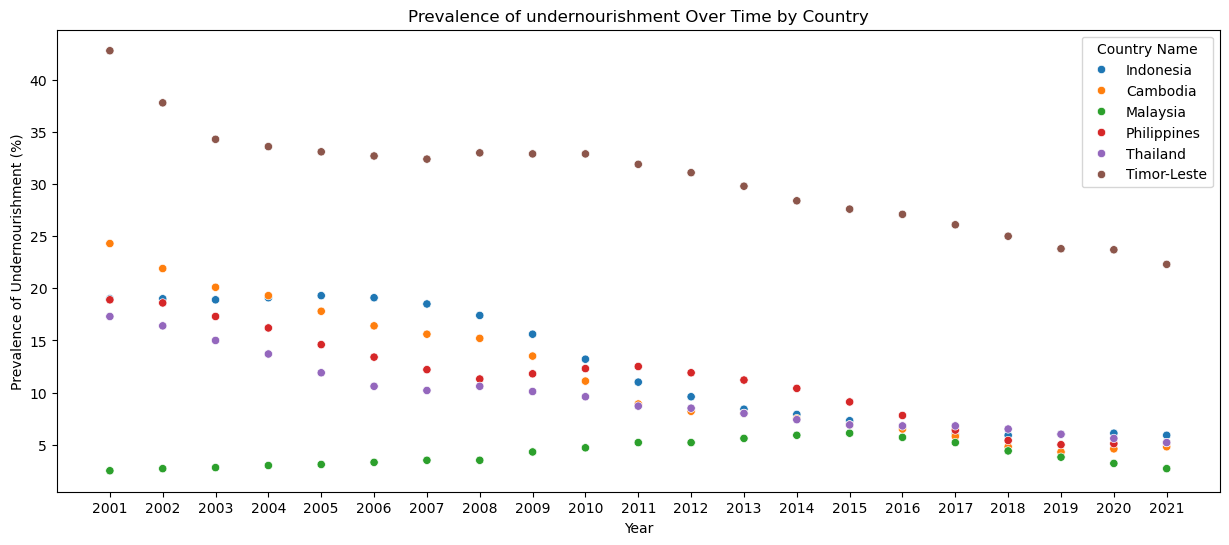

In [196]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=undernourishment, x="Year", y="undernourishment", hue="Country Name")
plt.ylabel("Prevalence of Undernourishment (%)")
plt.title("Prevalence of undernourishment Over Time by Country")

# Get unique years and set them as x-ticks
years = undernourishment['Year'].unique()
plt.xticks(ticks=np.arange(min(years), max(years)+1, 1))

plt.show()

### Summary of Prevalence of Undernourishment Trends

- **Lowest Prevalence**: Malaysia consistently maintains the lowest prevalence of undernourishment, reflecting strong food security and nutrition.
- **Significant Improvements**: Cambodia and Indonesia show substantial reductions in undernourishment, indicating effective measures to improve food security.
- **Moderate Improvements**: The Philippines shows a gradual but steady decrease in undernourishment.
- **Consistently Low Prevalence**: Thailand maintains a low prevalence of undernourishment with slight improvements over the years.
- **Critical Issues**: Timor-Leste has the highest prevalence of undernourishment, although it has decreased significantly over the period, it remains a critical issue.


---
## 5) Prevalence: Prevalence of Malaria

The incidence of malaria is a measure that tells us how many new cases of malaria occur in a population that is at risk of contracting the disease within a specific time period, usually a year. It is expressed per 1,000 people at risk.

**Example:**
- **High Incidence:** If the incidence of malaria is 50 per 1,000 population at risk, it means that out of every 1,000 people living in an area where malaria is present, 50 people get malaria in a year.
- **Low Incidence:** If the incidence is 5 per 1,000 population at risk, only 5 people out of every 1,000 at risk get malaria in a year.

In summary, the incidence of malaria (per 1,000 population at risk) shows us how many new cases of malaria are occurring among people who are at risk of the disease. This helps in understanding the spread of malaria and in planning appropriate public health interventions to reduce its impact.

In [200]:
# Filter the DataFrame to include only the rows where the 'Indicator Name' is Incidence of malaria
df_malaria = df_filter_countries[df_filter_countries['Indicator Name']=='Incidence of malaria (per 1,000 population at risk)'] 

In [201]:
# Drop the 'Indicator Name' column
df_malaria = df_malaria.drop(columns=['Indicator Name'])

In [202]:
# Reshape the DataFrame from wide format to long format
df_long_m = pd.melt(df_malaria, 
                  id_vars=['Country Name'], 
                  var_name='Year', 
                  value_name='malaria')

In [203]:
# Convert the 'Year' column to numeric
df_long_m['Year'] = pd.to_numeric(df_long_m['Year'], errors='coerce')

In [204]:
# Drop rows where the 'malaria' column has NaN values
malaria = df_long_m.dropna(subset=['malaria'])

In [205]:
# Group by 'Country Name' and Aggregate the 'malaria' column by calculating the mean for each country
aggregated_data_malaria = malaria.groupby('Country Name').agg({'malaria': 'mean'}).reset_index()

In [206]:
aggregated_data_malaria

,Country Name,malaria
0,Cambodia,28.299787
1,Indonesia,4.907565
2,Malaysia,3.868270
3,Philippines,0.911939
4,Thailand,2.224568
5,Timor-Leste,69.769960


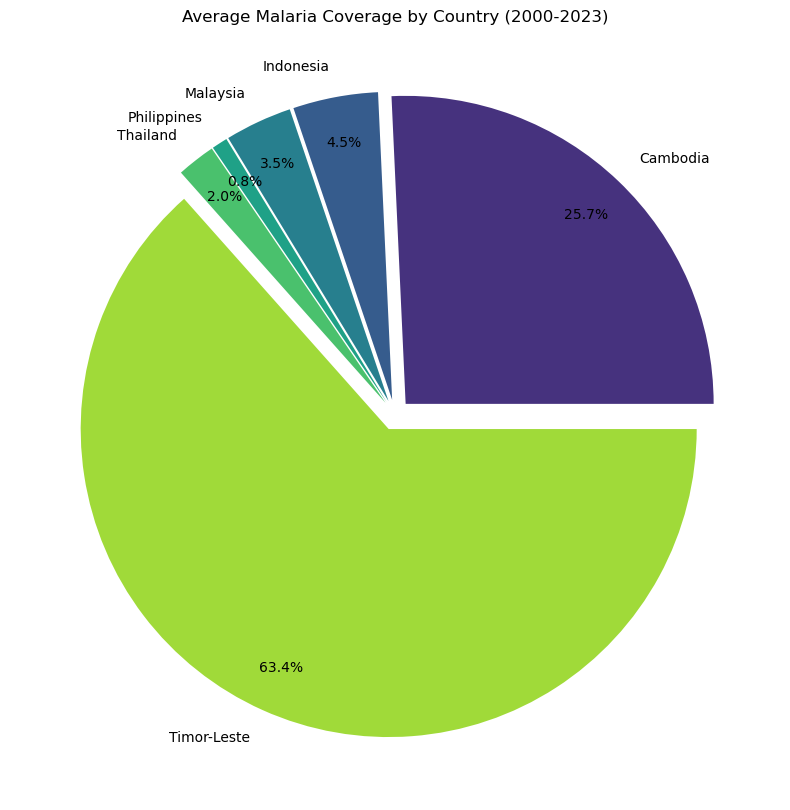

In [207]:

# Plotting a pie chart
plt.figure(figsize=(14, 10))
plt.pie(aggregated_data_malaria['malaria'], 
        labels=aggregated_data_malaria['Country Name'], 
        autopct='%1.1f%%', 
        colors=sns.color_palette('viridis', len(aggregated_data_malaria['Country Name'])),
        pctdistance=0.85,  # Adjust the position of the percentage labels
        labeldistance=1.1,  # Adjust the position of the country labels
        explode=[0.05] * len(aggregated_data_malaria['Country Name'])  # Separate slices slightly
       )

plt.title('Average Malaria Coverage by Country (2000-2023)')

plt.show()

### Summary of Malaria Coverage

- **Major Contributors**: 
  - Timor-Leste and Cambodia are the primary contributors to malaria coverage, together accounting for nearly 90% of the total.

- **Minor Contributors**: 
  - Indonesia, Malaysia, Thailand, and the Philippines collectively contribute the remaining 10%, with the Philippines having the least coverage.


---
## 6) Health Service Coverage: Coverage of essential health services

The UHC (Universal Health Coverage) service coverage index is a measure that evaluates how well a country is providing essential health services to its population. It reflects the extent to which people have access to the healthcare they need without suffering financial hardship.

**Example:**
- **High UHC Service Coverage Index:** If a country has an index score of 80, it means that a significant portion of its population has access to essential health services.
- **Low UHC Service Coverage Index:** If the score is 40, it suggests that many people in the country struggle to get the healthcare they need.

In summary, the UHC service coverage index helps us understand how well a country is providing essential health services to its population. A higher index score means better access to healthcare, while a lower score indicates that more people are likely struggling to receive the care they need.

In [211]:
# Filter the DataFrame to include only the rows where the 'Indicator Name' is UHC service coverage index
df_health_service_coverage = df_filter_countries[df_filter_countries['Indicator Name']=='UHC service coverage index'] 

In [212]:
# Drop the 'Indicator Name' column
df_health_service_coverage = df_health_service_coverage.drop(columns=['Indicator Name'])

In [213]:
# Reshape the DataFrame from wide format to long format
df_long_hsc = pd.melt(df_health_service_coverage, 
                  id_vars=['Country Name'], 
                  var_name='Year', 
                  value_name='health service coverage')

In [214]:
# Convert the 'Year' column to numeric
df_long_hsc['Year'] = pd.to_numeric(df_long_hsc['Year'], errors='coerce')

In [215]:
# Drop rows where the 'health service coverage' column has NaN values
health_service_coverage = df_long_hsc.dropna(subset=['health service coverage'])

In [216]:
health_service_coverage

,Country Name,Year,health service coverage
0,Brunei Darussalam,2000,49.0
1,Indonesia,2000,29.0
2,Cambodia,2000,24.0
3,Malaysia,2000,52.0
4,Philippines,2000,36.0
5,Singapore,2000,64.0
6,Thailand,2000,43.0
7,Timor-Leste,2000,28.0
40,Brunei Darussalam,2005,64.0
41,Indonesia,2005,34.0


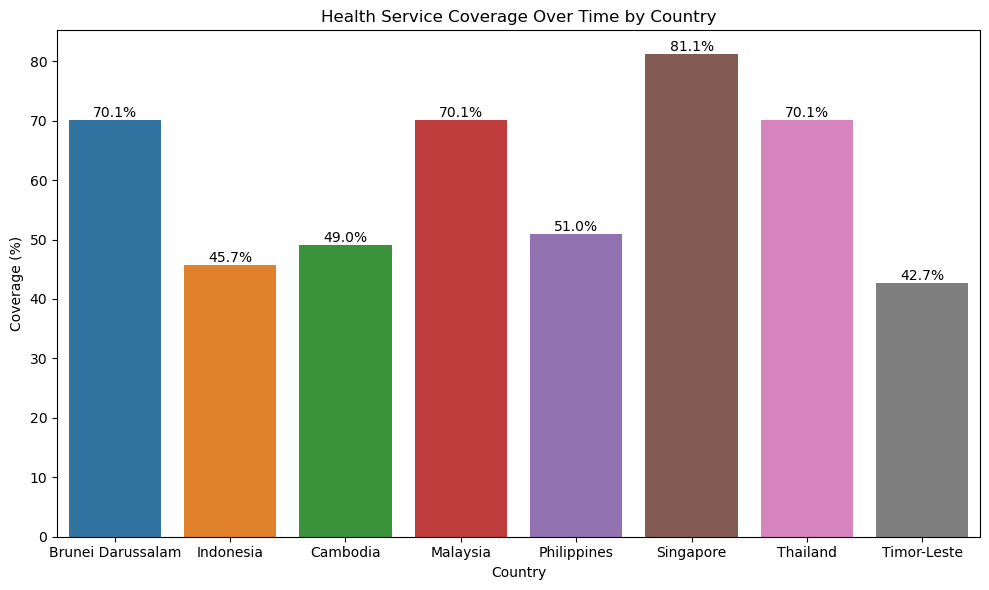

In [217]:
# Plotting with seaborn
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Country Name', y='health service coverage', data=health_service_coverage, hue='Country Name', errorbar=None)


# Adding percentage labels on top of bars
for bar in plot.patches:
    # Using text formatting to place percentage value on each bar
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(), 
             f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Health Service Coverage Over Time by Country')
plt.xlabel('Country')
plt.ylabel('Coverage (%)')

plt.tight_layout()
plt.show()

### Summary of Health Service Coverage

- **Highest Coverage**: 
  - Singapore stands out with the highest health service coverage at 81.1%.

- **Moderate Coverage**: 
laysia  - Ma, laysia and Thailand both have high coverage at 70.1%, followed by the Philippines at 51.0%.

- **Lowest Coverage**: 
  - Timor-Leste, Indonesia, and Cambodia have the lowest health service coverage, with Timor-Leste at the bottom (42.7%), followed by Indonesia (45.7%), and Cambodia a (49.0%).


---
## Conclusion

**Interpretation and Recommendations:**

**Connecting Visualizations to Problem Statement:** The EDA will show how factors like health service coverage and disease prevalence impact life expectancy. For example, a strong positive correlation between health service coverage and life expectancy suggests that improving healthcare access is crucial.

**Implications for SDG:** Findings can inform policy decisions, such as increasing investment in healthcare infrastructure in regions with low life expectancy.

**Recommendations:**

- **Increase Healthcare Funding:** Allocate more resources to regions with poor health indicators.
- **Disease Prevention Programs:** Implement programs targeting high-prevalence diseases like malaria.
- **Improve Data Collection:** Enhance data collection efforts to better track health indicators such as Prevalence of Undernourishment and Prevalence of Tobacco.
- **Nutritional Education Programs:** Develop and implement educational initiatives focused on improving nutrition and reducing undernourishment rates.
- **Tobacco Control Initiatives:** Introduce comprehensive tobacco control measures including awareness campaigns, smoking cessation programs, and policies aimed at reducing tobacco use prevalence.